In [4]:
import os
import pickle

import gym 
import numpy as np
from gym.wrappers import Monitor
from atep.niches.box2d.bipedal_walker_custom import BipedalWalkerCustom

import ray
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.decomposition import PCA

sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.5)

In [5]:
df_gen = pd.read_csv(r'dataframes\generalisation_on_itself.csv')
df_gen = df_gen.drop(['index'],axis=1)
df_gen.head()

,Environment,Fitness,SBT-ATEP,FBT-ATEP,E-POET40x40
0,1,Above 300,1,1,1
1,1,200 to 300,1,2,1
2,1,Below 200,78,77,78
3,2,Above 300,1,1,1
4,2,200 to 300,0,1,1


In [6]:
from turtle import title


fig = px.bar(data_frame=df_gen,x='Environment',y=['E-POET40x40'],color='Fitness',width=700,height=400)
fig.update_layout(
    
    
    xaxis=dict(title_text="Agents"),
    yaxis=dict(title_text="Environments"),
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    
)
)
fig.show()
fig = px.bar(data_frame=df_gen,x='Environment',y=['SBT-ATEP'],color='Fitness',width=700,height=400)
fig.update_layout(
    
    
    xaxis=dict(title_text="Agents"),
    yaxis=dict(title_text="Environments"),
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    
)
)
fig.show()
fig = px.bar(data_frame=df_gen,x='Environment',y=['FBT-ATEP'],color='Fitness',width=700,height=400)
fig.update_layout(
    
    xaxis=dict(title_text="Agents"),
    yaxis=dict(title_text="Environments"),
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    
)
)
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    )
)
fig.show()

In [54]:
"""ROUGH WORK
"""

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

ds = pd.read_csv(r"dataframes\df_specie_actions_25k.csv",index_col=0)
dft = pd.read_csv(r"dataframes\df_fitness_actions_25k.csv",index_col=0)
de = pd.read_csv(r"dataframes\df_ep40_actions_25k.csv",index_col=0)

ds.head()

,Action_1,Action_2,Action_3,Action_4
0,0.152654,-0.121003,0.442701,0.337897
1,-0.690806,-0.004038,0.119801,-0.225182
2,-0.572210,-0.254745,-0.061058,-0.425103
3,-0.430320,-0.019879,0.174774,-0.437426
4,0.035180,-0.050685,0.045088,-0.175254


In [55]:
for col in ds.columns:
    ds[col] = min_max_scaling(ds[col])

for col in dft.columns:
    dft[col] = min_max_scaling(dft[col])

for col in ds.columns:
    de[col] = min_max_scaling(de[col])


print(ds.max())

Action_1    1.0
Action_2    1.0
Action_3    1.0
Action_4    1.0
dtype: float64


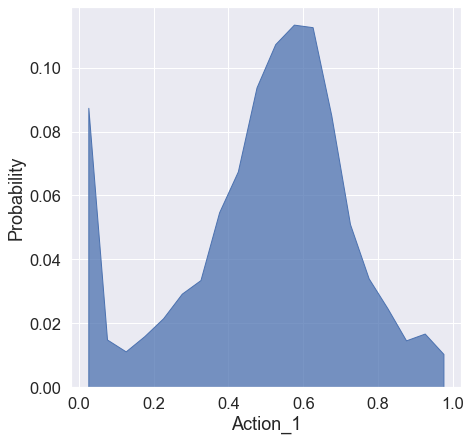

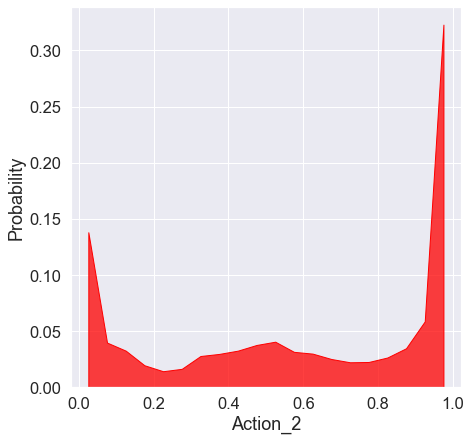

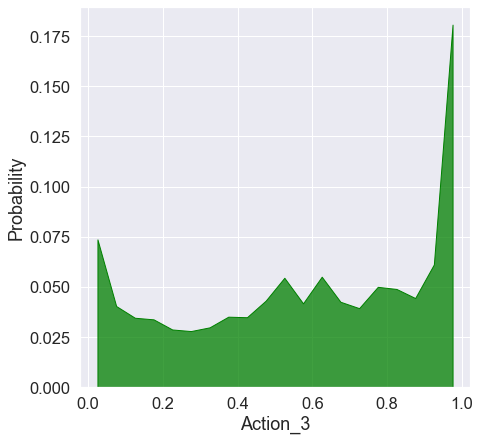

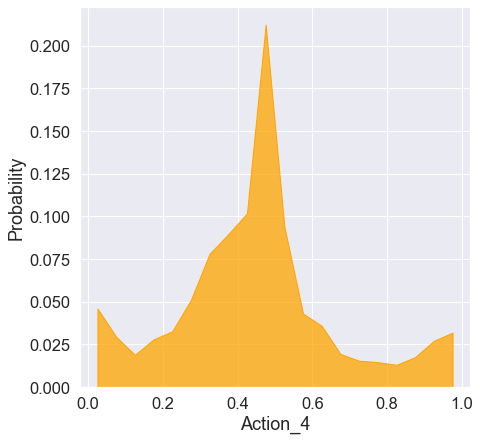

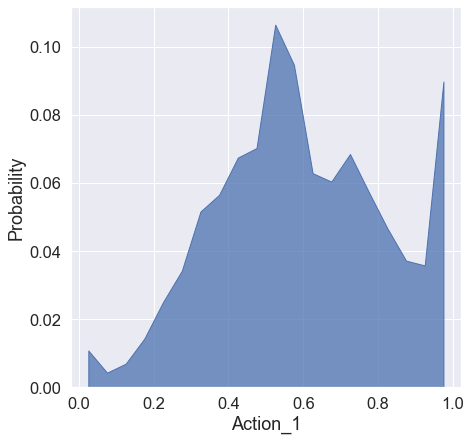

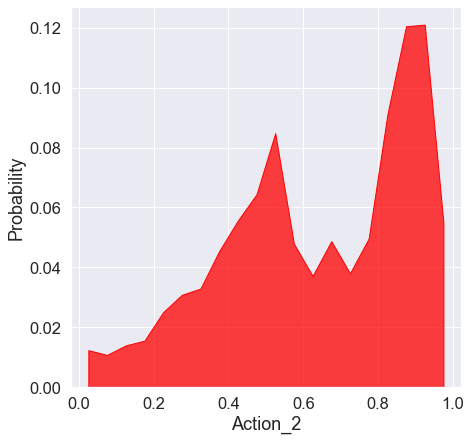

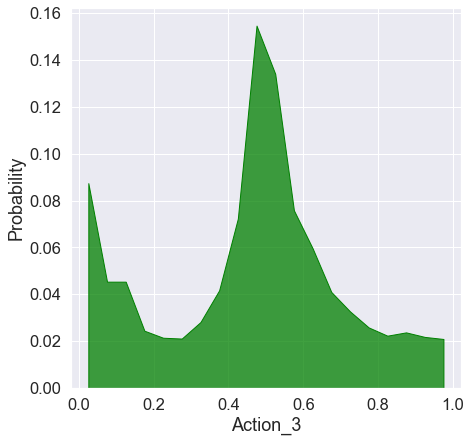

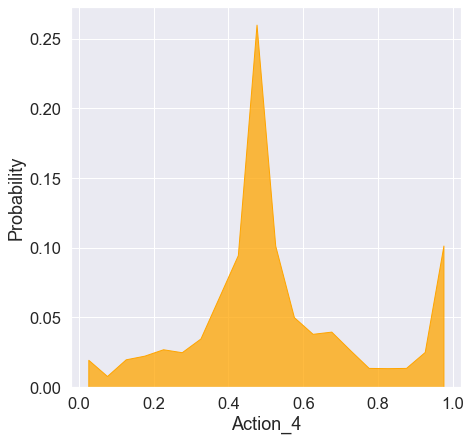

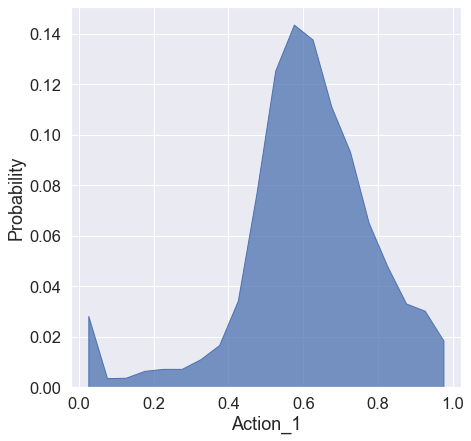

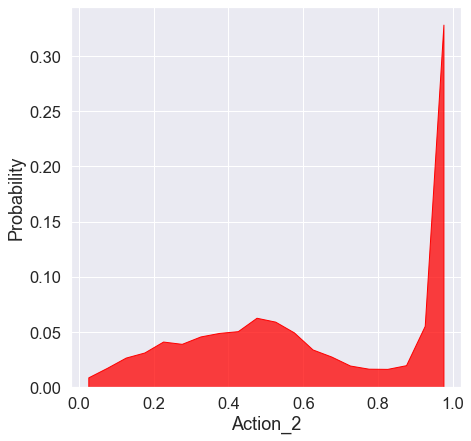

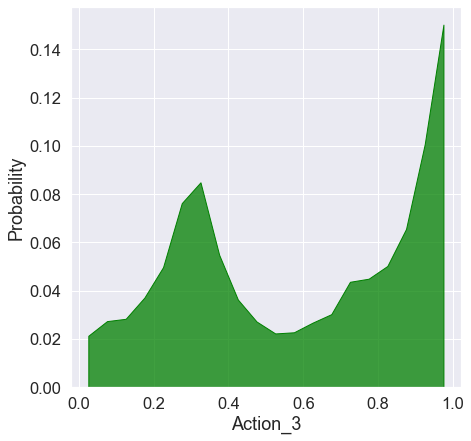

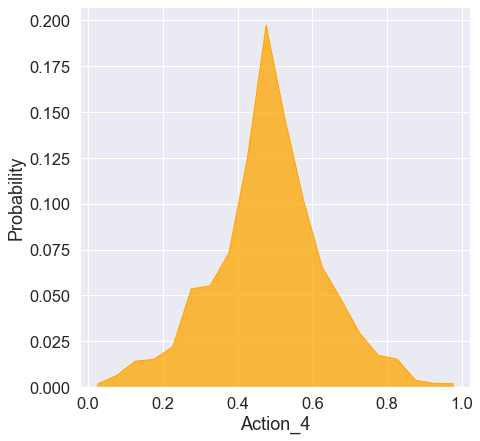

In [56]:
img_path = r"images\results24-09-22"
sns.histplot(ds['Action_1'],stat = 'probability',multiple='dodge',element='poly', bins=20)
plt.show()

sns.histplot(ds['Action_2'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='red')
plt.show()

sns.histplot(ds['Action_3'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='green')
plt.show()

sns.histplot(ds['Action_4'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='orange')
plt.show()




sns.histplot(dft['Action_1'],stat = 'probability',multiple='dodge',element='poly', bins=20)
plt.show()

sns.histplot(dft['Action_2'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='red')
plt.show()

sns.histplot(dft['Action_3'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='green')
plt.show()

sns.histplot(dft['Action_4'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='orange')
plt.show()


sns.histplot(de['Action_1'],stat = 'probability',multiple='dodge',element='poly', bins=20)
plt.show()

sns.histplot(de['Action_2'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='red')
plt.show()

sns.histplot(de['Action_3'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='green')
plt.show()

sns.histplot(de['Action_4'],stat = 'probability',multiple='dodge',element='poly', bins=20,color='orange')
plt.show()



In [59]:


df_fn_final = pd.read_csv(r'dataframes\df_fn_all.csv')

df_fn_final

,Iteration,Fitness,Nodes,ANNECS,Model
0,150,251.410926,3,0,FBT-ATEP
1,1000,312.618108,38,0,FBT-ATEP
2,2000,295.792597,58,0,FBT-ATEP
3,3000,320.578624,72,0,FBT-ATEP
4,4000,299.469099,88,5,FBT-ATEP
...,...,...,...,...,...
99,21000,298.330300,40,58,E-POET20x20
100,22000,302.456300,40,61,E-POET20x20
101,23000,303.213300,40,65,E-POET20x20
102,24000,301.602400,40,67,E-POET20x20


<Figure size 21.6x21.6 with 0 Axes>

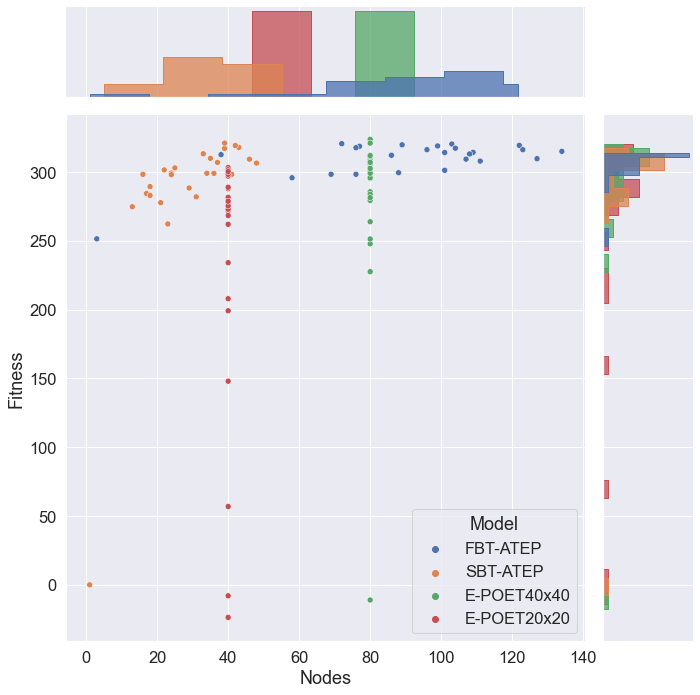

In [60]:
plt.figure(figsize = (0.3,0.3))
g = sns.JointGrid(data=df_fn_final,x='Nodes',y='Fitness', hue='Model',height=10)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, element='step',stat = 'density',multiple='dodge')

In [61]:
fig = px.line(df_fn_final,x='Iteration',y='Fitness',color='Model',width=700, height=400)
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    )
)

fig.show()

In [62]:
df_fn_final['Fitness-Nodes_Ratio'] = df_fn_final['Fitness'] / df_fn_final['Nodes']
fig = px.line(df_fn_final,x='Iteration',y='Fitness-Nodes_Ratio',color='Model',width=700, height=400)
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    )
)
fig.show()

In [63]:
df_fn_final['ANNECS-Nodes_Ratio'] = df_fn_final['ANNECS'] / df_fn_final['Nodes']
fig = px.line(df_fn_final,x='Iteration',y='ANNECS-Nodes_Ratio',color='Model',width=700, height=400)
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    )
)
fig.show()

In [64]:
df_fn_final['ANNECS-Fitness_Ratio'] = df_fn_final['ANNECS'] / df_fn_final['Fitness']
fig = px.line(df_fn_final,x='Iteration',y='ANNECS-Fitness_Ratio',color='Model',width=700, height=400)
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    )
)
fig.show()

In [65]:
df_fn_final['ANNECS-Fitness-Nodes_Ratio'] = ((0.7*df_fn_final['ANNECS']) + (df_fn_final['Fitness']*0.3))/ df_fn_final['Nodes']
fig = px.line(df_fn_final,x='Iteration',y='ANNECS-Fitness-Nodes_Ratio',color='Model',width=700, height=400)
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    )
)
fig.show()

In [66]:
df_fe = pd.DataFrame(data={
    "Models":["FBT-ATEP","SBT-ATEP","E-POET40x40","E-POET20x20"],
    "Function Evaluations":np.log([13724606625,17901986415,58312500,39122514])
    })



fig = px.bar(data_frame=df_fe,x='Models',y='Function Evaluations',width=700, height=400)
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    )
)
fig.show()


In [70]:
df_solved = pd.read_csv(r'dataframes\df_solved.csv')
df_solved

,Models,Fitness,Max,Mean
0,SBT,Above 300,60.00,30.00
1,SBT,200-300,40.00,60.00
2,SBT,Below 200,0.00,10.00
3,FBT,Above 300,60.00,30.00
4,FBT,200-300,35.00,50.00
5,FBT,Below 200,5.00,20.00
6,EPOET40x40,Above 300,61.67,33.33
7,EPOET40x40,200-300,28.33,43.33
8,EPOET40x40,Below 200,10.00,23.34
9,EPOET20x20,Above 300,31.67,20.34


In [71]:
fig.show()
fig = px.bar(data_frame=df_solved,x='Models',y='Mean',color='Fitness',width=700, height=400)
fig.update_layout(
    font_family="Arial",
    #font_color="blue",
    title_font_family="Arial",
    #title_font_color="red",
    #legend_title_font_color="green"
    font=dict(
        
        size=15,
        
    )
)
fig.show()

In [76]:
df_annecs = pd.read_csv(r'dataframes\ANNECS_seed_1.csv')
df_annecs

df_annecs_s2 = pd.read_csv(r'dataframes\ANNECS_seed_2.csv')




FileNotFoundError: [Errno 2] No such file or directory: 'dataframes\\ANNECS_seed_1.csv'

In [77]:
fig = px.line(x='Iterations',y='ANNECS',color='Model',data_frame=df_annecs,width=700, height=400)
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    font=dict(
        
        size=15,
        
    )
)

fig.show()

fig = px.line(x='Iterations',y='ANNECS',color='Model',data_frame=df_annecs_s2,width=700, height=400)
fig.update_layout(
    font_family="Arial",
    
    title_font_family="Arial",
    
    font=dict(
        
        size=15,
        
    )
)

fig.show()